In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [17]:
df = pd.read_csv('heart.csv')

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


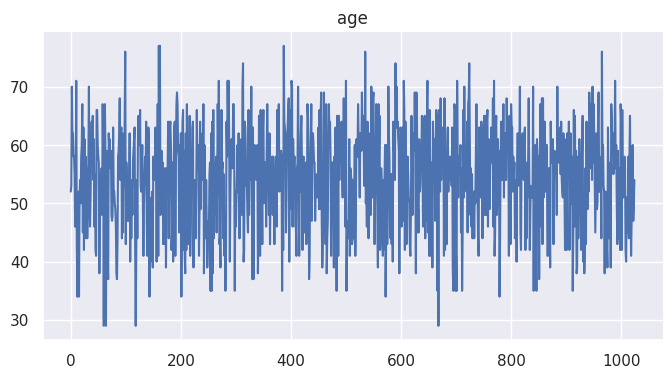

In [19]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

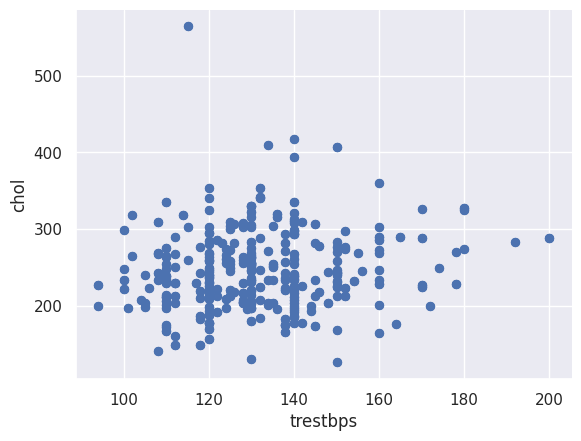

In [20]:
# @title trestbps vs chol

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

1    526
0    499
Name: target, dtype: int64


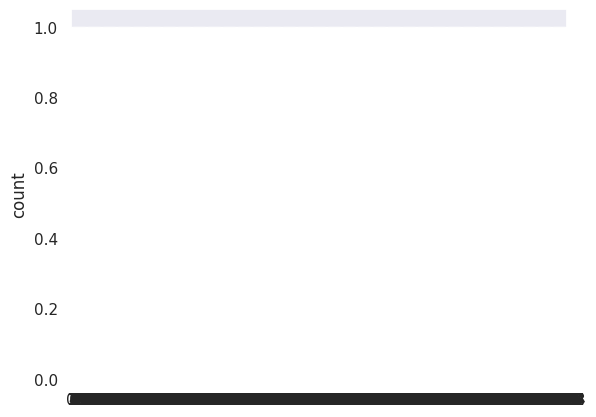

In [67]:
sns.countplot(df['target'])
print(df.target.value_counts())

<Axes: >

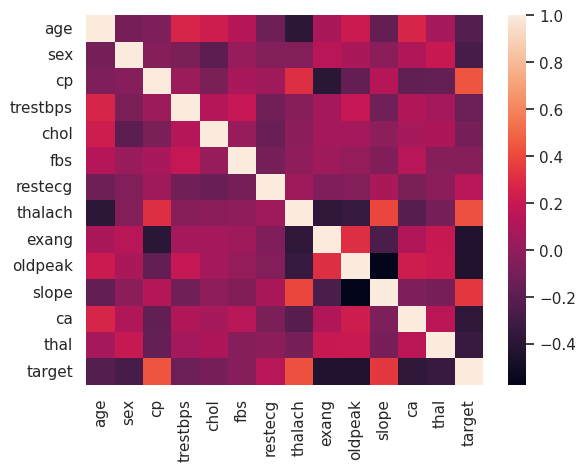

In [29]:
sns.heatmap(df.corr(),fmt='.2g')

<Axes: xlabel='exang'>

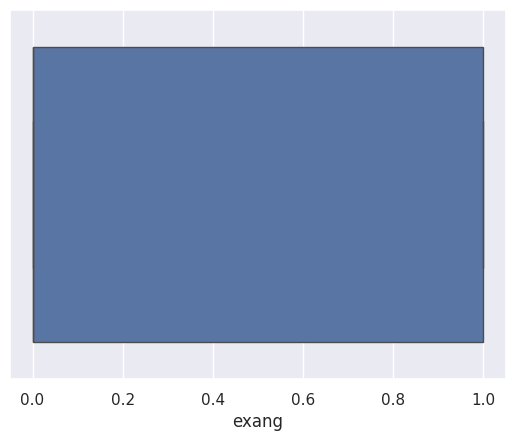

In [30]:
sns.boxplot(x=df["exang"])

<Axes: xlabel='age'>

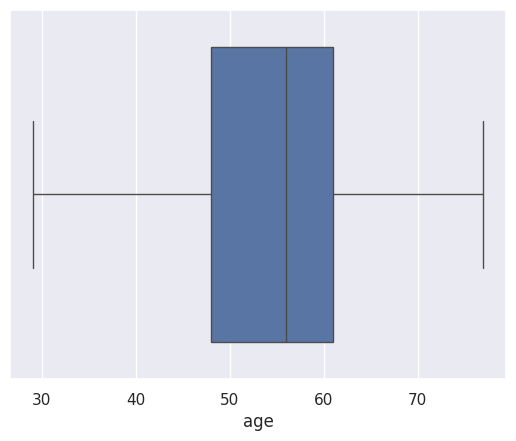

In [31]:
sns.boxplot(x=df["age"])

<Axes: xlabel='chol'>

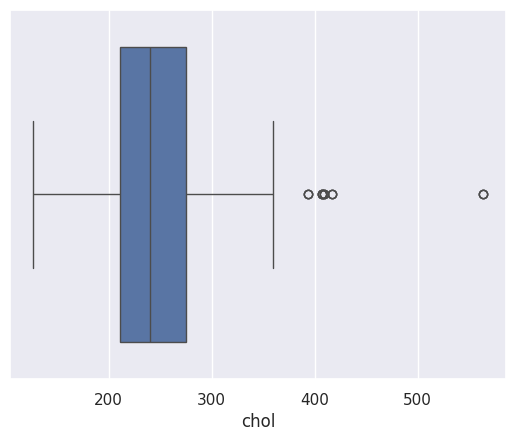

In [32]:
sns.boxplot(x=df["chol"])

In [33]:
import scipy.stats as stats
z=np.abs(stats.zscore(df))
data_clean=df[(z<2).all(axis=1)]
data_clean.shape


(592, 14)

<Axes: xlabel='chol'>

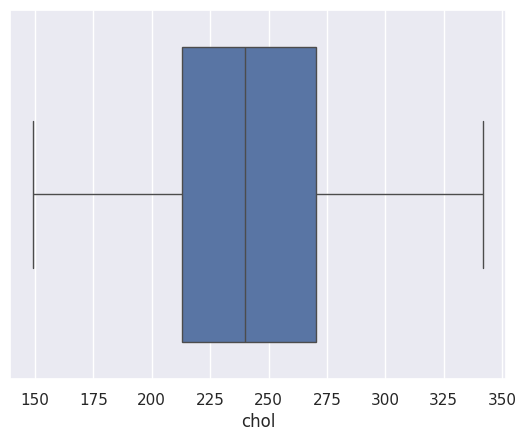

In [34]:
sns.boxplot(x=data_clean["chol"])

<Axes: >

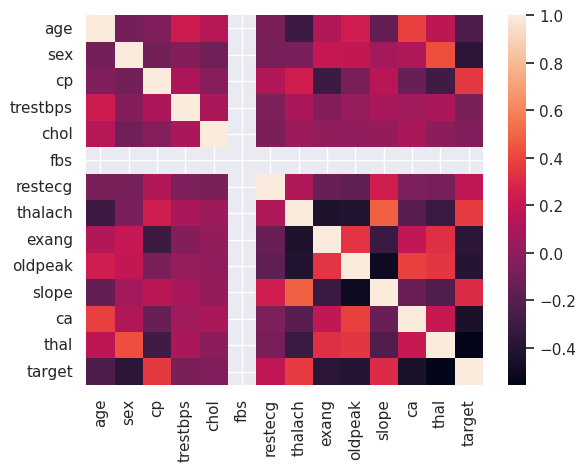

In [35]:
sns.heatmap(data_clean.corr(),fmt='.2g')

In [36]:
data_clean2=data_clean.drop(columns=['fbs'])

<Axes: >

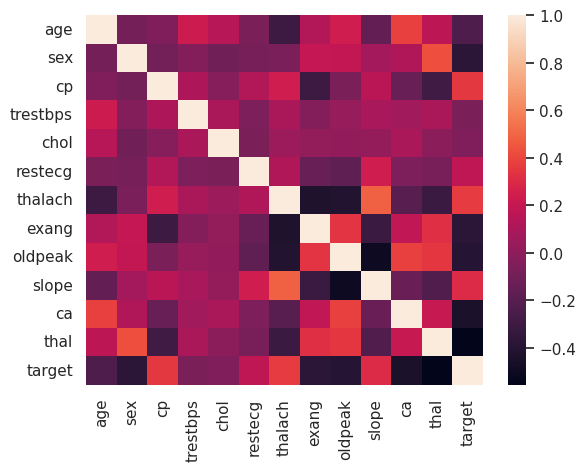

In [37]:
sns.heatmap(data_clean2.corr(),fmt='.2g')

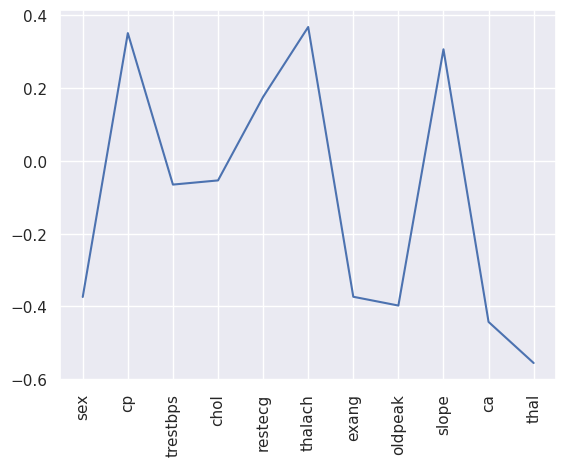

In [38]:
corr=data_clean2[data_clean2.columns[1:]].corr()['target'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [39]:
#random forest

In [40]:
X=data_clean2.drop('target',axis=1)
y=data_clean2['target']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [43]:
y_pred=rfc.predict(X_test)

In [44]:
print("accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy Score:  100.0 %


In [45]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precision Score :',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

F-1 Score : 1.0
Precision Score : 1.0
Recall Score : 1.0


Text(0.5, 1.0, 'Accuracy score: 100.0')

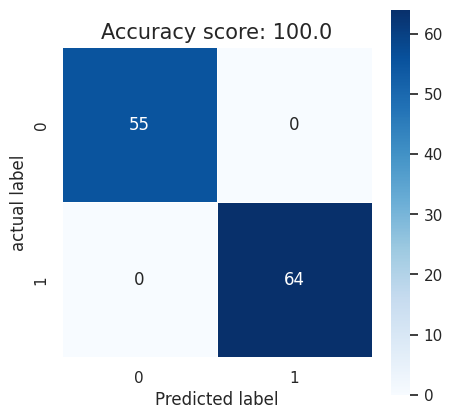

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel('actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(rfc.score(X_test,y_test)*100)
plt.title(all_sample_title,size=15)

<Axes: xlabel='Importance', ylabel='Feature Name'>

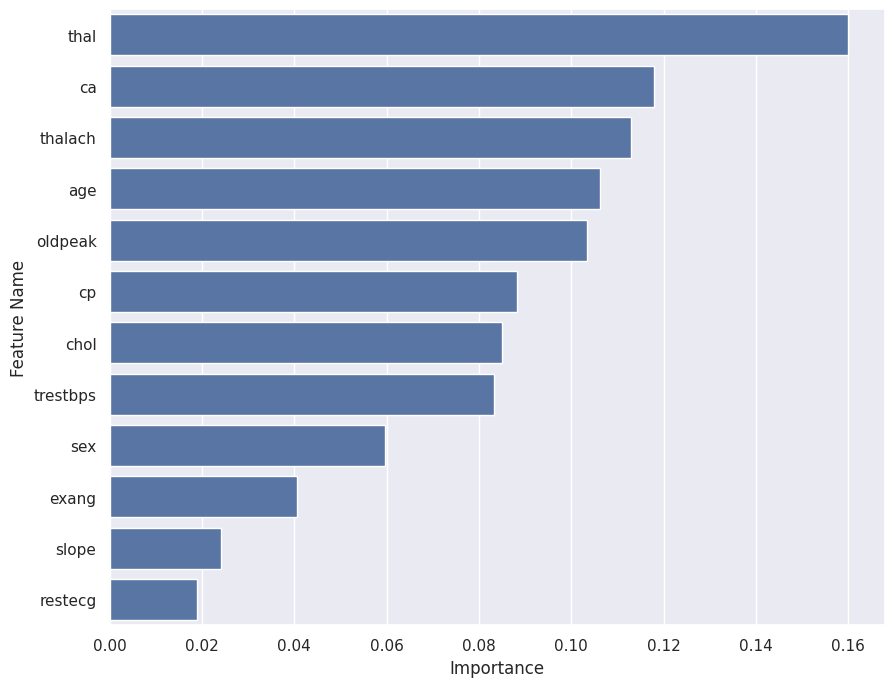

In [47]:
#feature impportance
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":rfc.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi,x='Importance',y='Feature Name')


In [48]:
#KNearest Neighbor

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred=knn.predict(X_test)
print("accuracy score",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score 77.31 %


In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [52]:
y_pred=lr.predict(X_test)
print("accuracy score",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score 81.51 %


In [53]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precision Score :',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

F-1 Score : 0.842857142857143
Precision Score : 0.7763157894736842
Recall Score : 0.921875


Text(0.5, 1.0, 'Accuracy score: 81.5126050420168')

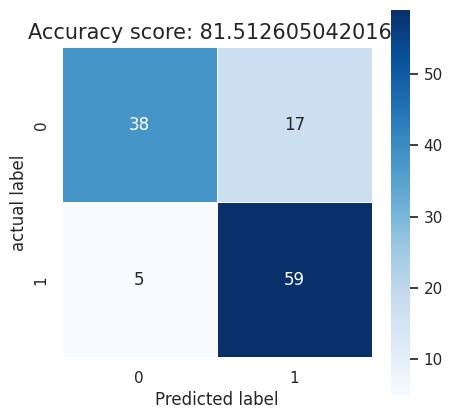

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel('actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(rfc.score(X_test,y_pred)*100)
plt.title(all_sample_title,size=15)

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [58]:
y_pred=ada.predict(X_test)
print("accuracy score",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score 95.8 %


In [59]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precision Score :',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

F-1 Score : 0.9618320610687023
Precision Score : 0.9402985074626866
Recall Score : 0.984375


Text(0.5, 1.0, 'Accuracy score: 95.7983193277311')

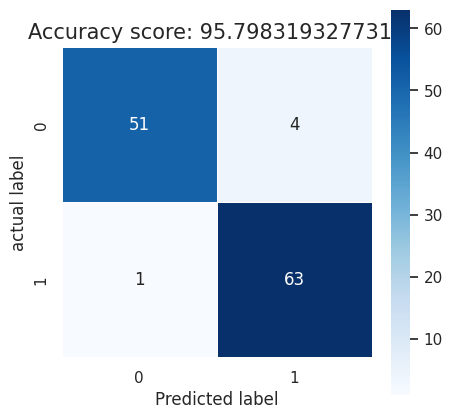

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel('actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(rfc.score(X_test,y_pred)*100)
plt.title(all_sample_title,size=15)

<Axes: xlabel='Importance', ylabel='Feature Name'>

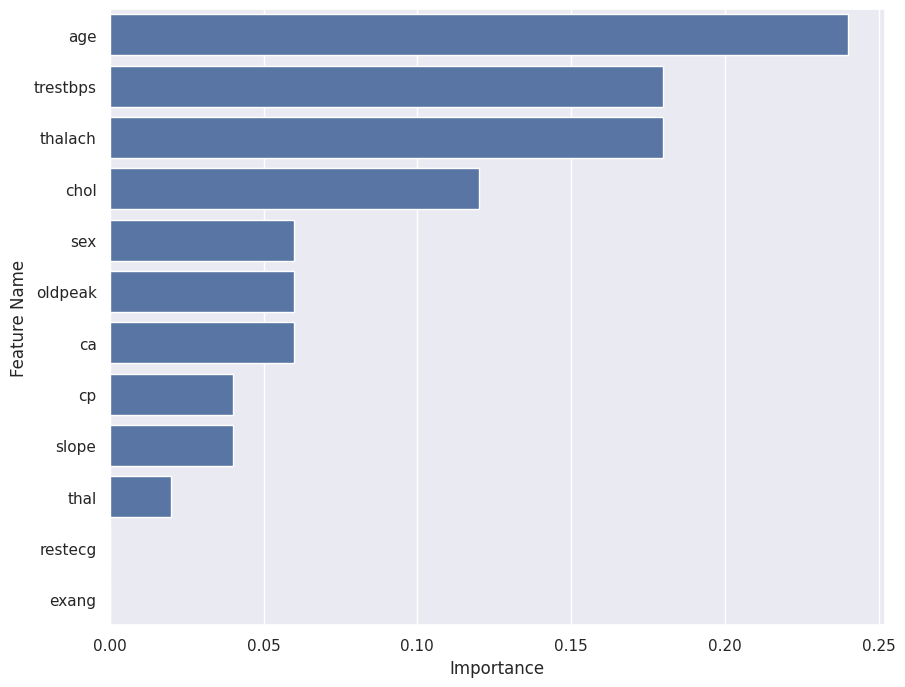

In [61]:
#feature impportance
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":ada.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi,x='Importance',y='Feature Name')


In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [63]:
y_pred=dtree.predict(X_test)
print("accuracy score",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score 100.0 %


In [64]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(y_test,y_pred)))
print('Precision Score :',(precision_score(y_test,y_pred)))
print('Recall Score :',(recall_score(y_test,y_pred)))

F-1 Score : 1.0
Precision Score : 1.0
Recall Score : 1.0


Text(0.5, 1.0, 'Accuracy score: 100.0')

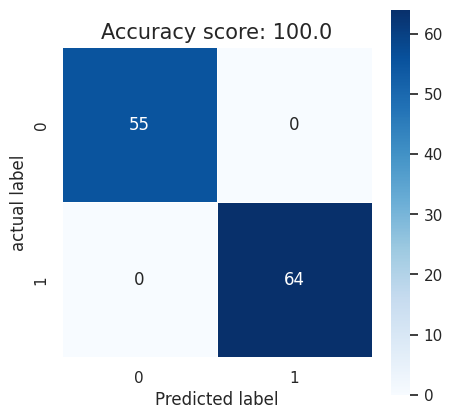

In [65]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel('actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}'.format(dtree.score(X_test,y_pred)*100)
plt.title(all_sample_title,size=15)

<Axes: xlabel='Importance', ylabel='Feature Name'>

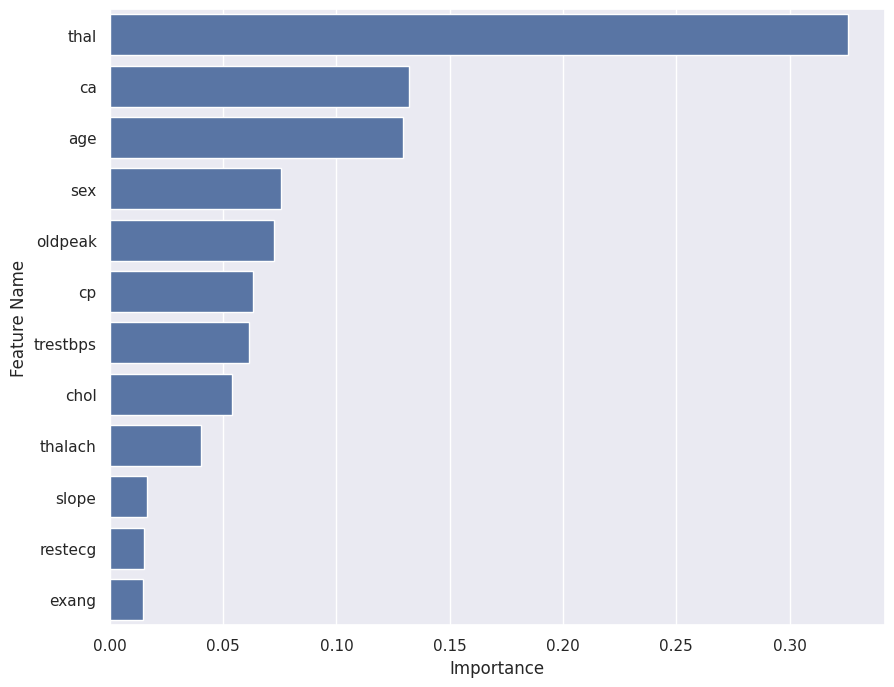

In [66]:
#feature impportance
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":dtree.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi,x='Importance',y='Feature Name')
